# ***OCON Model Evaluation***
*(12-features Complete Dataset)*

**Author:** S. Giacomelli

**Year:** 2023

**Affiliation:** Università degli studi di L'Aquila (Ph.D. candidate)

**Master Degree Thesis**: "*Vowel phonemes Analysis & Classification by means of OCON rectifiers Deep Learning Architectures*"

**Description:** One-Class-One-Network (OCON) Model metrics & evaluation

## Import scripts

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount("mnt")

Mounted at mnt


In [2]:
# Change Directory to Notebooks folder
%cd "mnt/MyDrive/Colab Notebooks"
%ls

/content/mnt/MyDrive/Colab Notebooks
 debug.ipynb   DSP_Udemy/   'RNN - LSTM - GRU in PyTorch.ipynb'
 dsppy.ipynb   DUDL_Udemy/   superdlpy.ipynb


In [3]:
# Import library install
!pip install import-ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:00


In [4]:
import superdlpy as DL  # Supervised-DL library

importing Jupyter notebook from superdlpy.ipynb
Processing Unit: CPU
/bin/bash: line 1: nvidia-smi: command not found


In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

SEED = 42

In [6]:
# Return to "content" folder (COLAB default)
%cd /content

/content


## Dataset

In [7]:
HGCW_dataset_utils = np.load(file='./HGCW_dataset_utils.npz')
print('Raw features                    Data shape:', HGCW_dataset_utils['HGCW_raw'].shape)
print('Fundamental Normalized features Data shape:', HGCW_dataset_utils['HGCW_fund_norm'].shape)
print('MinMax features                 Data shape:', HGCW_dataset_utils['HGCW_minmax'].shape)
print('Labels                          Data shape:', HGCW_dataset_utils['HGCW_labels'].shape)
print('Classes size                    Data shape:', HGCW_dataset_utils['classes_size'].shape)
print('Classes indices                 Data shape:', HGCW_dataset_utils['classes_idx'].shape)

x_data_raw_np = HGCW_dataset_utils['HGCW_raw']
x_data_fund_norm = HGCW_dataset_utils['HGCW_fund_norm']
x_data_minmax = HGCW_dataset_utils['HGCW_minmax']
y_labels_raw_np = HGCW_dataset_utils['HGCW_labels']
vow_size = HGCW_dataset_utils['classes_size']
end_idx = HGCW_dataset_utils['classes_idx']

# Auxiliary lists
vowels = ['ae', 'ah', 'aw', 'eh', 'er', 'ei', 'ih', 'iy', 'oa', 'oo', 'uh', 'uw']  # Vowels list
colors = ['red', 'saddlebrown', 'darkorange', 'darkgoldenrod', 'gold', 'darkkhaki', 'olive', 'darkgreen', 'steelblue', 'fuchsia', 'indigo', 'black']

Raw features                    Data shape: (1597, 13)
Fundamental Normalized features Data shape: (1597, 13)
MinMax features                 Data shape: (1597, 13)
Labels                          Data shape: (1597, 1)
Classes size                    Data shape: (12,)
Classes indices                 Data shape: (13,)


## Architectures & Model (initialization)
(see "*One-Class_Sub-Network_Analysis.ipynb*")

```
Multi-Layer Perceptron (Binary Logistic Regression)
- Input Layer: 3x4 features (formant ratios, min-max normalized)
- Hidden Layer: 100 units
- Output Layer: 1 normalized probability
---------------------------------------------------------------
- Learning Rate: 0.0001 (10^-4)
- Optimizer: Adam (Adaptive Momentum)
---------------------------------------------------------------
- Mini-Batch Training:
    . Re-iterated Sub-Dataset Shuffling
    . Early Stopping (Test Accuracy driven)
    . Batch size = 32
---------------------------------------------------------------
- Regularization:
    . Weight Decay (L2 Penalty): 0.0001 (10^-4)
    . DropOut:
        * Input Layer Drop Rate: 0.8
        * Hidden Layer Drop Rate: 0.5.
    . Batch Normalization
```
```
- Ensemble Training:
    . Epochs: 1000  (for each "Data Batch-Set")
    . Early Stop Loss breakpoint: 0.15
    . Early Stop Accuracy breakpoint: 95%
    . Shuffling classes tolerance: 0.01
```

In [8]:
# OCON Model init: 12 MLP binary classifiers (input = 12(3x4) flattened features vector)
classifiers_bank = DL.OCON_model(DL.MLP_bin_classifier, class_labels=vowels, seed=SEED, in_features=12, hidden_units=100, act_fun='ReLU', rate_in=0.8, rate_hidden=0.5)

In [9]:
# Load Pre-trained states (for each MLP classifier)
states_path = ["ae_subnet_Params.pth",
               "ah_subnet_Params.pth",
               "aw_subnet_Params.pth",
               "eh_subnet_Params.pth",
               "er_subnet_Params.pth",
               "ei_subnet_Params.pth",
               "ih_subnet_Params.pth",
               "iy_subnet_Params.pth",
               "oa_subnet_Params.pth",
               "oo_subnet_Params.pth",
               "uh_subnet_Params.pth",
               "uw_subnet_Params.pth"]

for i in range(len(classifiers_bank)):
    DL.model_state_io(classifiers_bank[i], states_path[i], mode='load')

Loaded Parameters (from "ae_subnet_Params.pth") into: ae_subnet
Loaded Parameters (from "ah_subnet_Params.pth") into: ah_subnet
Loaded Parameters (from "aw_subnet_Params.pth") into: aw_subnet
Loaded Parameters (from "eh_subnet_Params.pth") into: eh_subnet
Loaded Parameters (from "er_subnet_Params.pth") into: er_subnet
Loaded Parameters (from "ei_subnet_Params.pth") into: ei_subnet
Loaded Parameters (from "ih_subnet_Params.pth") into: ih_subnet
Loaded Parameters (from "iy_subnet_Params.pth") into: iy_subnet
Loaded Parameters (from "oa_subnet_Params.pth") into: oa_subnet
Loaded Parameters (from "oo_subnet_Params.pth") into: oo_subnet
Loaded Parameters (from "uh_subnet_Params.pth") into: uh_subnet
Loaded Parameters (from "uw_subnet_Params.pth") into: uw_subnet


In [10]:
# Model Description
for i in range(len(classifiers_bank)):
    print(f'OCON "{classifiers_bank[i].name}" Classifier STATE')
    DL.model_state(classifiers_bank[i], input_size=(1, 12))
    print()

OCON "ae_subnet" Classifier STATE
Layer (type:depth-idx)                   Output Shape              Param #
MLP_bin_classifier                       [1, 1]                    --
├─ModuleDict: 1-1                        --                        --
│    └─Linear: 2-1                       [1, 100]                  1,300
│    └─BatchNorm1d: 2-2                  [1, 100]                  200
│    └─Linear: 2-3                       [1, 100]                  10,100
│    └─Linear: 2-4                       [1, 1]                    101
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05
----------------------------------------------------------------
Params Description:
Parameter Name      : layers.input.weight
Parameter Weights   : tensor([[ 1.3784e-01,  4.3163e-01, -1.6110e-01,  ...,  2.2480e-01,
         -5.2725e-01, -8.5309e-02],

In [11]:
# Test Correctness
ocon_predictions, ocon_dist_errors, ocon_eval_accuracies, ocon_g_truths = DL.OCON_eval(classifiers_bank, features_data=x_data_minmax[:, 1:], labels=y_labels_raw_np)

AE_SUBNET Evaluation - Accuracy: 94.55%
AH_SUBNET Evaluation - Accuracy: 91.80%
AW_SUBNET Evaluation - Accuracy: 89.86%
EH_SUBNET Evaluation - Accuracy: 93.74%
ER_SUBNET Evaluation - Accuracy: 93.43%
EI_SUBNET Evaluation - Accuracy: 96.37%
IH_SUBNET Evaluation - Accuracy: 94.55%
IY_SUBNET Evaluation - Accuracy: 96.49%
OA_SUBNET Evaluation - Accuracy: 93.49%
OO_SUBNET Evaluation - Accuracy: 95.62%
UH_SUBNET Evaluation - Accuracy: 90.98%
UW_SUBNET Evaluation - Accuracy: 93.74%


## Evaluation Metrics

### Post-Training evaluation
- Accuracy
- *Predicted --> Measured* error
- Positive predictions PMD

In [12]:
# Dataset Evaluation Analysis Plot
plt.figure(figsize=(12, 3 * len(classifiers_bank)))
plot_ticks = end_idx[:]
plot_ticks = np.delete(plot_ticks, -1)

for i in range(len(classifiers_bank)):
    plt.subplot(len(classifiers_bank), 3, (i * 3) + 1)
    plt.plot(ocon_predictions[i], 'k.', label='Raw Predictions')
    plt.plot(ocon_g_truths[i], 'rx', label='Ground Truths')
    plt.axhline(0.5, linestyle='--', color='grey')
    plt.title(f'{classifiers_bank[i].name.upper()} Predictions Accuracy: {ocon_eval_accuracies[i]:.2f}%')
    plt.xlabel('Data (Indices)')
    plt.xticks(ticks=plot_ticks, labels=vowels)
    plt.ylabel('Normalized Probability')
    plt.grid()
    plt.legend(loc='best')

    plt.subplot(len(classifiers_bank), 3, (i * 3) + 2)
    plt.plot(ocon_dist_errors[i], 'k')
    plt.title(f'Predicted to Measured Error')
    plt.xlabel('Data (Indices)')
    plt.xticks(ticks=plot_ticks, labels=vowels)
    plt.ylabel('Normalized Probability Error')
    plt.ylim([-1.1, 1.1])
    plt.grid()

    plt.subplot(len(classifiers_bank), 3, (i * 3) + 3)

    # Predictions list processing
    predictions_temp = ocon_predictions[i]
    class_predictions = [item for sublist in predictions_temp for item in sublist]  # Turn a list of lists in a single list (of tensors)
    for j in range(len(class_predictions)):  # Turn a list of tensors of one variable in a list of scalars (item() method)
        class_predictions[j] = class_predictions[j].item()

    # Positives & False-Positives extraction
    positives = []
    for w in range(len(vowels)):
        num = (np.array(class_predictions[end_idx[w]: end_idx[w + 1]]) > 0.5).sum()
        positives.append(num)

    plt.bar(np.arange(len(vowels)), positives, color='k')
    plt.title(f'"{vowels[i]}" Positive Probabilities Distribution')
    plt.xlabel('Normalized Probabilities')
    plt.ylabel('Occurences (in samples)')
    plt.xticks([n for n in range(12)], vowels)
    plt.grid()

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### One-Class Evaluation (Balanced Sub-sets)
- Confusion Matrix & features
- ROC-AUC & features

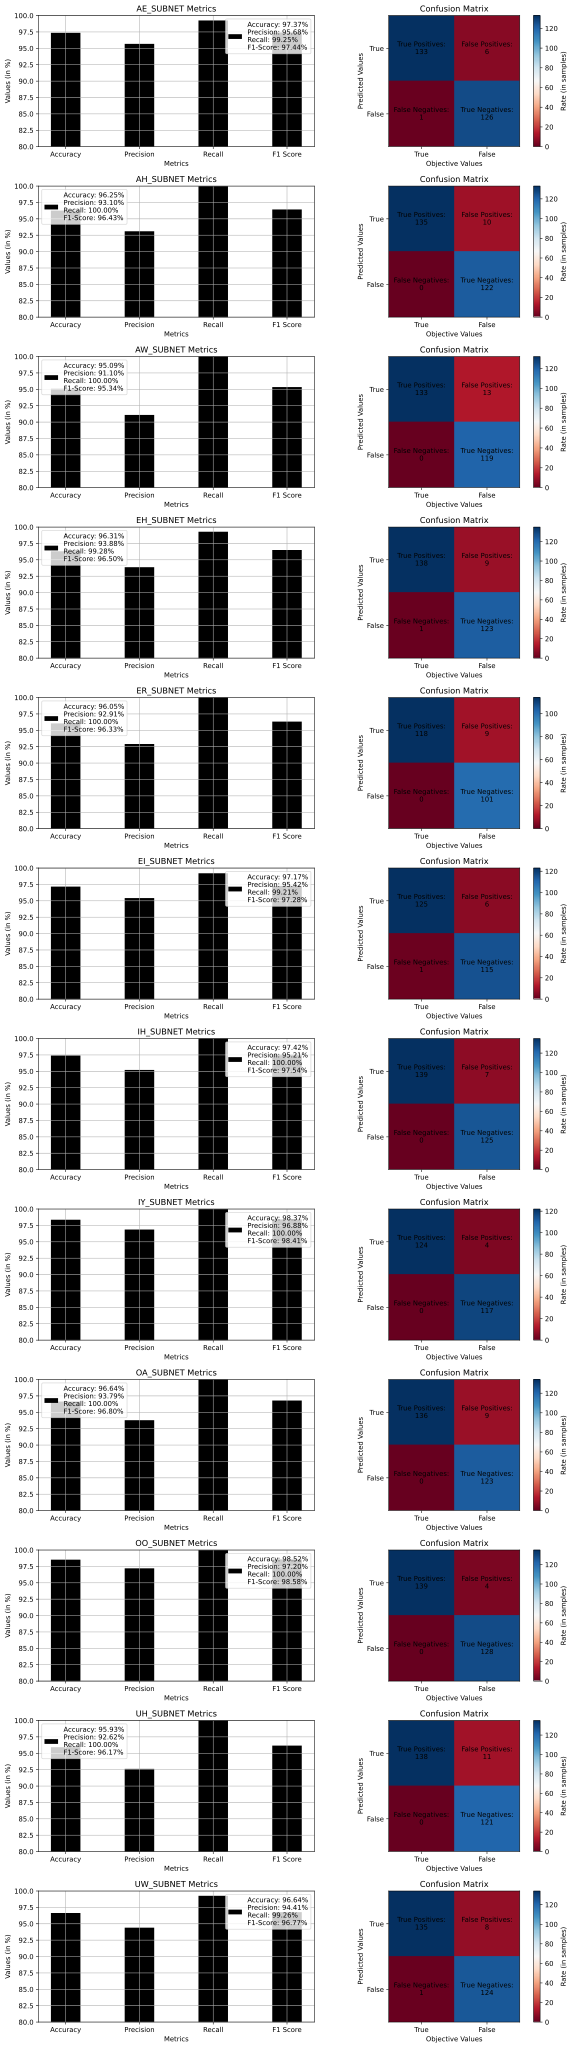

In [13]:
metrics_list = []
matrices = []
sub_datasets_size = []
for i in range(len(classifiers_bank)):
    # One-Hot Encoding
    sub_data, sub_data_labels_bin, sub_data_labels = DL.one_hot_encoder(sel_class_number=i, x_data=x_data_minmax, labels_tot=12, classes_size=vow_size, classes_idx=end_idx, debug=False)
    sub_datasets_size.append(sub_data.shape[0])

    # Compute i-esimal One-Class predictions
    predictions_proba = classifiers_bank[i](torch.tensor(sub_data[:, 1:]).float())

    # Compute i-esimal Confusion Matrix
    conf_ordered, metrics = DL.binary_eval((predictions_proba.detach() > 0.5).float().numpy().T, sub_data_labels_bin, plot=False)
    metrics_list.append(metrics)
    matrices.append(conf_ordered)

# Plot Results
plt.figure(figsize=(12, 3.5 * len(classifiers_bank)))

for i in range(len(classifiers_bank)):
    plt.subplot(len(classifiers_bank), 2, (i * 2) + 1)
    plt.bar(np.arange(4), metrics_list[i], 0.4, color='k',
            label=f'Accuracy: {metrics_list[i][0]:.2f}%\nPrecision: {metrics_list[i][1]:.2f}%\nRecall: {metrics_list[i][2]:.2f}%\nF1-Score: {metrics_list[i][3]:.2f}%')
    plt.title(f'{classifiers_bank[i].name.upper()} Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values (in %)')
    plt.xticks([0, 1, 2, 3], ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    plt.ylim([80, 100])
    plt.grid()
    plt.legend(loc='best')

    plt.subplot(len(classifiers_bank), 2, (i * 2) + 2)
    plt.imshow(matrices[i], cmap='RdBu', vmin = 0, vmax = sub_datasets_size[i] // 2)
    plt.title('Confusion Matrix')
    plt.xlabel('Objective Values')
    plt.ylabel('Predicted Values')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['True','False'])
    plt.yticks([0, 1], ['True','False'])
    plt.colorbar(label='Rate (in samples)')

    plt.text(0, 0,f'True Positives:\n{matrices[i][0,0]}' ,ha='center',va='center', color='k')
    plt.text(0, 1,f'False Negatives:\n{matrices[i][1,0]}',ha='center',va='center', color='k')
    plt.text(1, 1,f'True Negatives:\n{matrices[i][1,1]}' ,ha='center',va='center', color='k')
    plt.text(1, 0,f'False Positives:\n{matrices[i][0,1]}',ha='center',va='center', color='k')

plt.tight_layout()
plt.show()

--------AE_SUBNET ROC-AUC & DET Metrics--------
True Positive Rate      (TPR)   : 99.25%
True Negative Rate      (TNR)   : 96.97%
False Positive Rate     (FPR)   : 3.03%
False Negative Rate     (FNR)   : 0.75%
------------------------------
Error Rate                      : 0.02
False Discovery Rate    (FDR)   : 0.03
False Omission Rate     (FOR)   : 0.01
Negative Predicted Values Index : 0.99
-----------------------------------------------

--------AH_SUBNET ROC-AUC & DET Metrics--------
True Positive Rate      (TPR)   : 100.00%
True Negative Rate      (TNR)   : 93.18%
False Positive Rate     (FPR)   : 6.82%
False Negative Rate     (FNR)   : 0.00%
------------------------------
Error Rate                      : 0.03
False Discovery Rate    (FDR)   : 0.06
False Omission Rate     (FOR)   : 0.00
Negative Predicted Values Index : 1.00
-----------------------------------------------

--------AW_SUBNET ROC-AUC & DET Metrics--------
True Positive Rate      (TPR)   : 100.00%
True Negative Rat

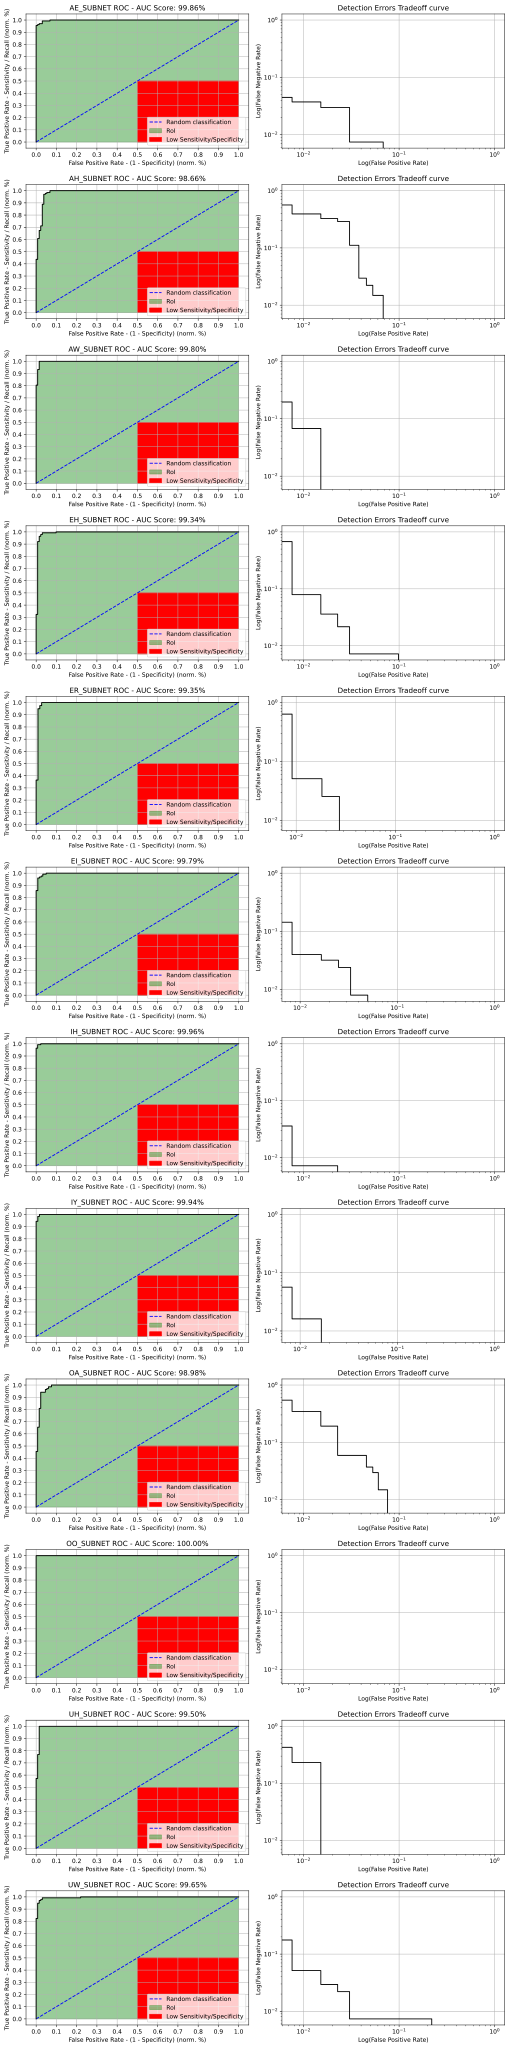

In [15]:
# ROC-AUC Score & Features
roc_metrics_list = []
roc_plot_measures = []
for i in range(len(classifiers_bank)):
    # One-Hot Encoding
    sub_data, sub_data_labels_bin, sub_data_labels = DL.one_hot_encoder(sel_class_number=i, x_data=x_data_minmax, labels_tot=12, classes_size=vow_size, classes_idx=end_idx, debug=False)
    sub_datasets_size.append(sub_data.shape[0])

    # Compute i-esimal One-Class predictions
    predictions_proba = classifiers_bank[i](torch.tensor(sub_data[:, 1:]).float())

    model_predictions = (predictions_proba.detach() > 0.5).float().numpy()
    ground_truths = sub_data_labels_bin

    # Features computation
    true_positives = len(np.where((model_predictions == 1) & (ground_truths == 1))[0])
    false_positives = len(np.where((model_predictions == 1) & (ground_truths == 0))[0])
    true_negatives = len(np.where((model_predictions == 0) & (ground_truths == 0))[0])
    false_negatives = len(np.where((model_predictions == 0) & (ground_truths == 1))[0])
    true_positive_rate = (true_positives / (true_positives + false_negatives)) * 100
    true_negative_rate = (true_negatives / (true_negatives + false_positives)) * 100
    false_positive_rate = 100 - true_negative_rate
    false_negative_rate = 100 - true_positive_rate

    print(f'--------{classifiers_bank[i].name.upper()} ROC-AUC & DET Metrics--------')
    print(f'True Positive Rate      (TPR)   : {true_positive_rate:.2f}%')
    print(f'True Negative Rate      (TNR)   : {true_negative_rate:.2f}%')
    print(f'False Positive Rate     (FPR)   : {false_positive_rate:.2f}%')
    print(f'False Negative Rate     (FNR)   : {false_negative_rate:.2f}%')
    print('------------------------------')
    print(f'Error Rate                      : {((false_positives + false_negatives) / ground_truths.size):.2f}')
    print(f'False Discovery Rate    (FDR)   : {(false_positives / (false_positives + true_positives)):.2f}')
    print(f'False Omission Rate     (FOR)   : {(false_negatives / (false_negatives + true_negatives)):.2f}')
    print(f'Negative Predicted Values Index : {(true_negatives / (true_negatives + false_negatives)):.2f}')
    print('-----------------------------------------------')
    print()

    _, _, _, _, auc, fpr, tpr = DL.binary_roc_auc_det(predictions_proba.detach().float().numpy(), ground_truths, plot=False)

    roc_metrics_list.append([true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate, auc])
    roc_plot_measures.append([fpr, tpr, 1-tpr])

# Plot Results
plt.figure(figsize=(12, 4 * len(classifiers_bank)))
for i in range(len(classifiers_bank)):
    plt.subplot(len(classifiers_bank), 2, (i * 2) + 1)
    plt.title(f'{classifiers_bank[i].name.upper()} ROC - AUC Score: {roc_metrics_list[i][4]:.2f}%')
    plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random classification')
    plt.plot(roc_plot_measures[i][0], roc_plot_measures[i][1], color='k')
    plt.fill_between(roc_plot_measures[i][0], roc_plot_measures[i][1], color='green', alpha=0.4, label='RoI')
    plt.fill_between((0.5, 1), (0, 0.5), step='pre', color='red', label='Low Sensitivity/Specificity')
    plt.xlabel('False Positive Rate - (1 - Specificity) (norm. %)')
    plt.ylabel('True Positive Rate - Sensitivity / Recall (norm. %)')
    plt.grid()
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.legend(loc='best')

    plt.subplot(len(classifiers_bank), 2, (i * 2) + 2)
    plt.title(f'Detection Errors Tradeoff curve')
    plt.plot(roc_plot_measures[i][0], roc_plot_measures[i][2], 'k')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Log(False Positive Rate)')
    plt.ylabel('Log(False Negative Rate)')
    plt.grid()

plt.tight_layout()
plt.show()

### One-Class evaluation (Overall Dataset)
- Confusion Matrix & features
- ROC-AUC & features

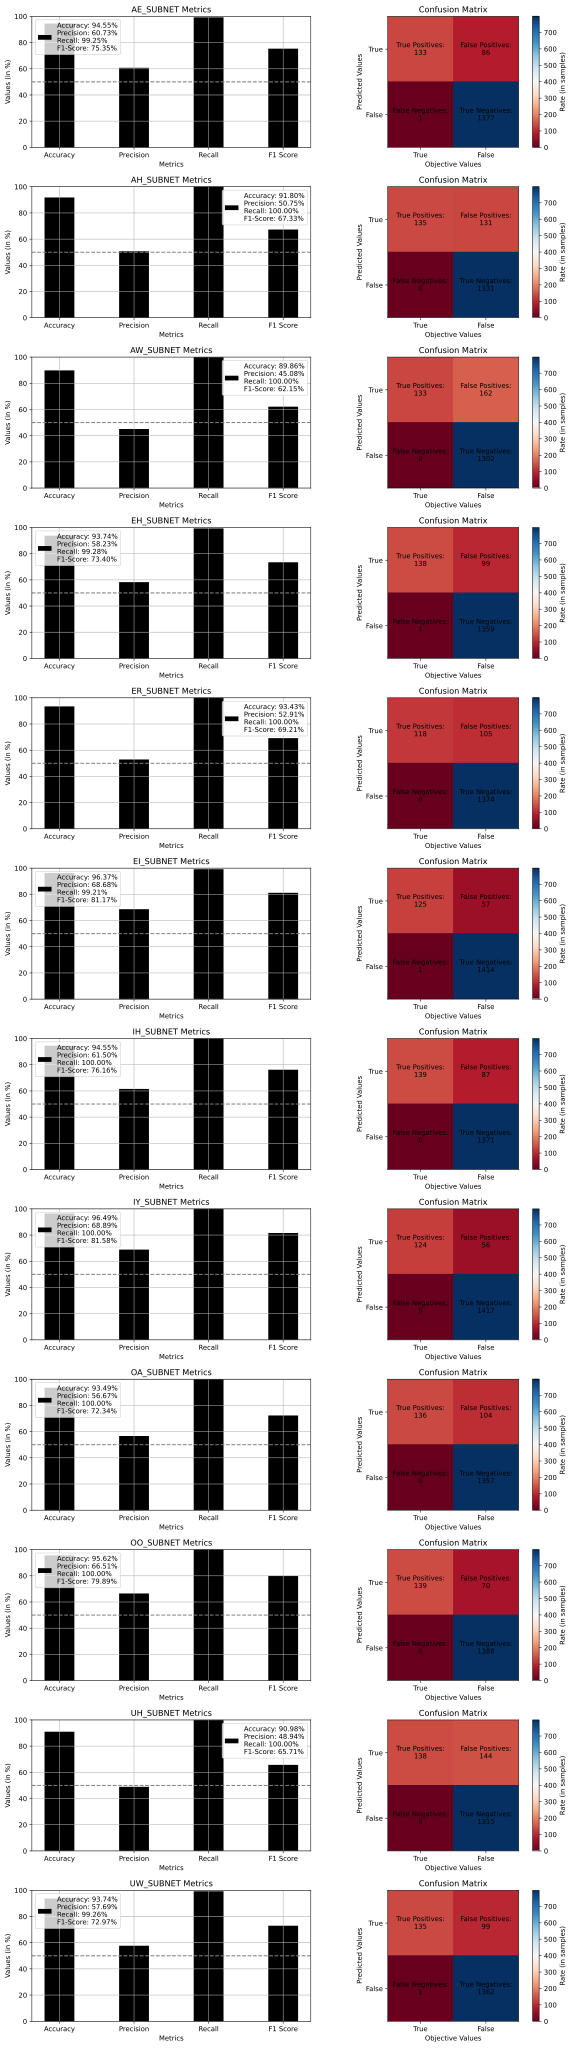

In [ ]:
# Confusion Matrix & Features
metrics_list = []
matrices = []
for i in range(len(classifiers_bank)):
    conf_ordered, metrics = DL.binary_eval((ocon_predictions[i] > 0.5).float().numpy().T, ocon_g_truths[i], plot=False)
    metrics_list.append(metrics)
    matrices.append(conf_ordered)

# Plot Results
plt.figure(figsize=(12, 3.5 * len(classifiers_bank)))

for i in range(len(classifiers_bank)):
    plt.subplot(len(classifiers_bank), 2, (i * 2) + 1)
    plt.bar(np.arange(4), metrics_list[i], 0.4, color='k',
            label=f'Accuracy: {metrics_list[i][0]:.2f}%\nPrecision: {metrics_list[i][1]:.2f}%\nRecall: {metrics_list[i][2]:.2f}%\nF1-Score: {metrics_list[i][3]:.2f}%')
    plt.axhline(y=50, color='grey', linestyle='--')
    plt.title(f'{classifiers_bank[i].name.upper()} Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Values (in %)')
    plt.xticks([0, 1, 2, 3], ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    plt.ylim([0, 100])
    plt.grid()
    plt.legend(loc='best')

    plt.subplot(len(classifiers_bank), 2, (i * 2) + 2)
    plt.imshow(matrices[i], cmap='RdBu', vmin = 0, vmax = ocon_g_truths[i].shape[0] // 2)
    plt.title('Confusion Matrix')
    plt.xlabel('Objective Values')
    plt.ylabel('Predicted Values')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['True','False'])
    plt.yticks([0, 1], ['True','False'])
    plt.colorbar(label='Rate (in samples)')

    plt.text(0, 0,f'True Positives:\n{matrices[i][0,0]}' ,ha='center',va='center', color='k')
    plt.text(0, 1,f'False Negatives:\n{matrices[i][1,0]}',ha='center',va='center', color='k')
    plt.text(1, 1,f'True Negatives:\n{matrices[i][1,1]}' ,ha='center',va='center', color='k')
    plt.text(1, 0,f'False Positives:\n{matrices[i][0,1]}',ha='center',va='center', color='k')

plt.tight_layout()
plt.show()

--------AE_SUBNET ROC-AUC & DET Metrics--------
True Positive Rate      (TPR)   : 99.25%
True Negative Rate      (TNR)   : 94.12%
False Positive Rate     (FPR)   : 5.88%
False Negative Rate     (FNR)   : 0.75%
------------------------------
Error Rate                      : 0.05
False Discovery Rate    (FDR)   : 0.39
False Omission Rate     (FOR)   : 0.00
Negative Predicted Values Index : 1.00
-----------------------------------------------

--------AH_SUBNET ROC-AUC & DET Metrics--------
True Positive Rate      (TPR)   : 100.00%
True Negative Rate      (TNR)   : 91.04%
False Positive Rate     (FPR)   : 8.96%
False Negative Rate     (FNR)   : 0.00%
------------------------------
Error Rate                      : 0.08
False Discovery Rate    (FDR)   : 0.49
False Omission Rate     (FOR)   : 0.00
Negative Predicted Values Index : 1.00
-----------------------------------------------

--------AW_SUBNET ROC-AUC & DET Metrics--------
True Positive Rate      (TPR)   : 100.00%
True Negative Rat

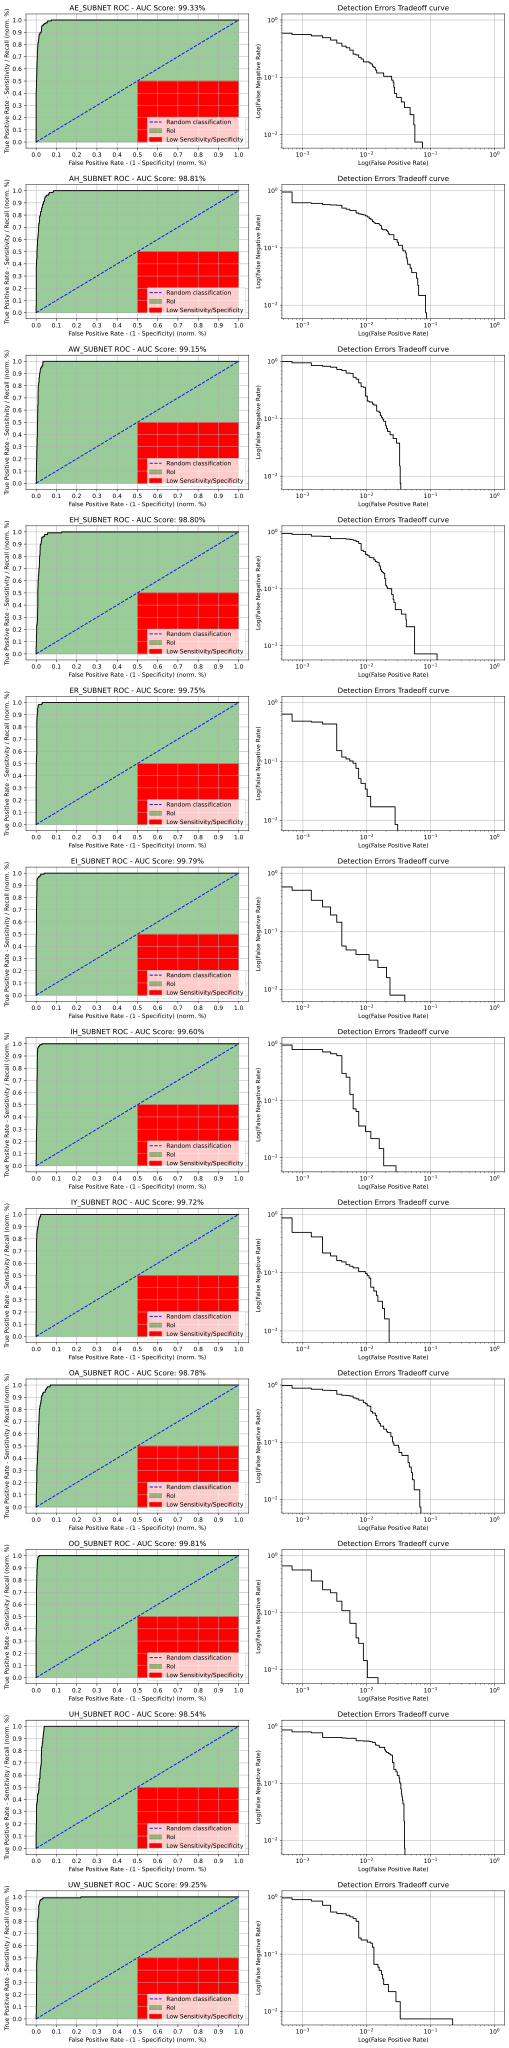

In [16]:
# ROC-AUC Score & Features
roc_metrics_list = []
roc_plot_measures = []
for i in range(len(classifiers_bank)):
    model_predictions = (ocon_predictions[i] > 0.5).float().numpy()
    ground_truths = ocon_g_truths[i]

    # Features computation
    true_positives = len(np.where((model_predictions == 1) & (ground_truths == 1))[0])
    false_positives = len(np.where((model_predictions == 1) & (ground_truths == 0))[0])
    true_negatives = len(np.where((model_predictions == 0) & (ground_truths == 0))[0])
    false_negatives = len(np.where((model_predictions == 0) & (ground_truths == 1))[0])
    true_positive_rate = (true_positives / (true_positives + false_negatives)) * 100
    true_negative_rate = (true_negatives / (true_negatives + false_positives)) * 100
    false_positive_rate = 100 - true_negative_rate
    false_negative_rate = 100 - true_positive_rate

    print(f'--------{classifiers_bank[i].name.upper()} ROC-AUC & DET Metrics--------')
    print(f'True Positive Rate      (TPR)   : {true_positive_rate:.2f}%')
    print(f'True Negative Rate      (TNR)   : {true_negative_rate:.2f}%')
    print(f'False Positive Rate     (FPR)   : {false_positive_rate:.2f}%')
    print(f'False Negative Rate     (FNR)   : {false_negative_rate:.2f}%')
    print('------------------------------')
    print(f'Error Rate                      : {((false_positives + false_negatives) / ground_truths.size):.2f}')
    print(f'False Discovery Rate    (FDR)   : {(false_positives / (false_positives + true_positives)):.2f}')
    print(f'False Omission Rate     (FOR)   : {(false_negatives / (false_negatives + true_negatives)):.2f}')
    print(f'Negative Predicted Values Index : {(true_negatives / (true_negatives + false_negatives)):.2f}')
    print('-----------------------------------------------')
    print()

    true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate, auc, fpr, tpr = DL.binary_roc_auc_det(ocon_predictions[i].float().numpy(), ground_truths, plot=False)

    roc_metrics_list.append([true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate, auc])
    roc_plot_measures.append([fpr, tpr, 1-tpr])

# Plot Results
plt.figure(figsize=(12, 4 * len(classifiers_bank)))
for i in range(len(classifiers_bank)):
    plt.subplot(len(classifiers_bank), 2, (i * 2) + 1)
    plt.title(f'{classifiers_bank[i].name.upper()} ROC - AUC Score: {roc_metrics_list[i][4]:.2f}%')
    plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random classification')
    plt.plot(roc_plot_measures[i][0], roc_plot_measures[i][1], color='k')
    plt.fill_between(roc_plot_measures[i][0], roc_plot_measures[i][1], color='green', alpha=0.4, label='RoI')
    plt.fill_between((0.5, 1), (0, 0.5), step='pre', color='red', label='Low Sensitivity/Specificity')
    plt.xlabel('False Positive Rate - (1 - Specificity) (norm. %)')
    plt.ylabel('True Positive Rate - Sensitivity / Recall (norm. %)')
    plt.grid()
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.legend(loc='best')

    plt.subplot(len(classifiers_bank), 2, (i * 2) + 2)
    plt.title(f'Detection Errors Tradeoff curve')
    plt.plot(roc_plot_measures[i][0], roc_plot_measures[i][2], 'k')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Log(False Positive Rate)')
    plt.ylabel('Log(False Negative Rate)')
    plt.grid()

plt.tight_layout()
plt.show()

### MaxNetwork (*ensembling*)

In [ ]:
# MaxNet predictions matrix
ocon_predictions_prob = np.zeros((len(ocon_predictions), x_data_minmax.shape[0]))  # NumPy predictions matrix (12 * 1617)

# Convert from List of Tensors to 2D NumPy Array
for i in range(len(ocon_predictions)):
    ocon_predictions_prob[i, :] = ocon_predictions[i].detach().squeeze().numpy()

maxnet_class_predictions = []  # Classes Outputs list initialization
# MaxNet application
for i in range(x_data_minmax.shape[0]):
    print(f'Dataset Sample({i + 1}) Class Evaluation')

    samp_predictions = ocon_predictions_prob[:, i]  # Array of 12 predictions for each Dataset sample (OCON outputs)
    class_prediction = DL.MaxNet_algo(samp_predictions, DL.MaxNet, n_units=12, eps=-0.1)  # MaxNet Instance
    maxnet_class_predictions.append(class_prediction)  # Result appending
    print('-----------------------------------------------')

maxnet_accuracy = 100 * np.mean((np.array(maxnet_class_predictions).reshape(1597, 1) == y_labels_raw_np))  # Accuracy computation
print(f'Maxnet Output --> Phoneme ACCURACY: {maxnet_accuracy}%')

Dataset Sample(1) Class Evaluation
Maximum Value found in 3 iterations
-----------------------------------------------
Dataset Sample(2) Class Evaluation
Maximum Value found in 8 iterations
-----------------------------------------------
Dataset Sample(3) Class Evaluation
Maximum Value found in 16 iterations
-----------------------------------------------
Dataset Sample(4) Class Evaluation
Maximum Value found in 2 iterations
-----------------------------------------------
Dataset Sample(5) Class Evaluation
Maximum Value found in 1 iterations
-----------------------------------------------
Dataset Sample(6) Class Evaluation
Maximum Value found in 10 iterations
-----------------------------------------------
Dataset Sample(7) Class Evaluation
Maximum Value found in 15 iterations
-----------------------------------------------
Dataset Sample(8) Class Evaluation
Maximum Value found in 2 iterations
-----------------------------------------------
Dataset Sample(9) Class Evaluation
Maximum Va

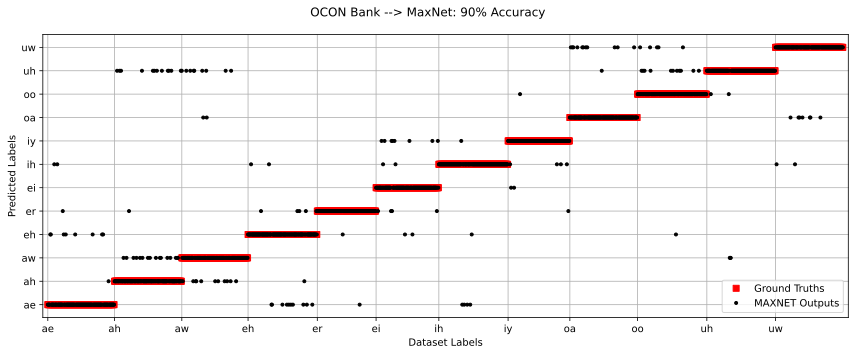

In [ ]:
# MaxNet Evaluation Plot
plt.figure(figsize=(12, 5))
plt.suptitle(f'OCON Bank --> MaxNet: {maxnet_accuracy:.0f}% Accuracy')

plot_x_ticks = end_idx[:]
plot_x_ticks = np.delete(plot_x_ticks, len(end_idx) - 1)
plot_y_ticks = [n for n in range(len(vowels))]

plt.plot(y_labels_raw_np, 'rs', label='Ground Truths')
plt.plot(maxnet_class_predictions, 'k.', label='MAXNET Outputs')
plt.xlabel('Dataset Labels')
plt.xticks(ticks=plot_x_ticks, labels=vowels)
plt.xlim([-10, len(y_labels_raw_np) + 10])
plt.ylabel('Predicted Labels')
plt.yticks(ticks=plot_y_ticks, labels=vowels)
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()